# House Pricing - A Statistical Analysis & Machine Learning

We will work on this step by step.
Topics:
1. Data Preparation
2. Data Analysis
3. Statistical Tests
4. Implement a linear regression model
5. Exploring model results
6. Some visualzations

# Importing necessary libraries and functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
plt.style.use('seaborn')
sns.set(palette='bright')
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.4f}'.format

In [4]:
from pagayapro.paths.data_paths import ASSIGNMENT3_DATA

# Load the datasets

load the data.

In [5]:
data = pd.read_csv(os.path.join(ASSIGNMENT3_DATA, "house_features.csv"))
data.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,"2,003.0000",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.0000",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.0000",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.0000",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.0000",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data.shape

(1460, 82)

## Split to train and test

We will split the data to train and test.
<br>We can't perform statistical analysis which includes the test data, since that would lead to **overfitting** on the test set (we will elaborate on that later on). Therfore we will first split the data.

In [7]:
train = data.sample(frac=0.8,random_state=1) # random_state is the random_seed
test = data.drop(train.index)

# Explore the data

## Number of rows and columns

Find how many rows and columns we have in train and test

In [8]:
print(train.shape)
print(test.shape)

(1168, 82)
(292, 82)


## Present a statistical description of the numerical features

Write down the mean, std, quantiles, etc of each of these features (can be done in one line of code)

In [9]:
train_descibe = train.describe()
train_descibe

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,"1,168.0000","1,168.0000","1,168.0000",963.0000,"1,168.0000","1,168.0000","1,168.0000","1,168.0000","1,168.0000","1,162.0000","1,168.0000","1,168.0000","1,168.0000","1,168.0000","1,168.0000","1,168.0000","1,168.0000","1,168.0000","1,168.0000","1,168.0000","1,168.0000","1,168.0000","1,168.0000","1,168.0000","1,168.0000","1,168.0000","1,102.0000","1,168.0000","1,168.0000","1,168.0000","1,168.0000","1,168.0000","1,168.0000","1,168.0000","1,168.0000","1,168.0000","1,168.0000","1,168.0000","1,168.0000"
mean,719.3219,720.3219,57.3459,70.1059,"10,355.9110",6.0873,5.5736,"1,971.4854","1,984.6704",104.9509,446.7115,45.3622,562.4349,"1,054.5086","1,162.1353",347.8836,5.6995,"1,515.7183",0.4212,0.0625,1.5702,0.3776,2.8553,1.0514,6.5068,0.6122,"1,978.5181",1.7688,473.0317,93.2988,45.5300,22.4632,3.0334,15.5728,3.4486,49.6010,6.3613,"2,007.8031","181,132.9255"
std,420.3979,420.3979,42.8332,24.6127,"8,390.0070",1.3981,1.1192,30.2503,20.7046,186.8202,464.6336,157.1603,444.6071,447.6257,390.8679,437.7416,47.5181,530.5305,0.5210,0.2457,0.5571,0.5040,0.8262,0.2285,1.6240,0.6449,24.7374,0.7461,212.9000,124.0268,64.0452,62.3954,27.3477,56.6167,44.8969,549.5847,2.7013,1.3301,"80,521.2100"
min,0.0000,1.0000,20.0000,21.0000,"1,300.0000",1.0000,1.0000,"1,872.0000","1,950.0000",0.0000,0.0000,0.0000,0.0000,0.0000,334.0000,0.0000,0.0000,334.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2.0000,0.0000,"1,900.0000",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,"2,006.0000","34,900.0000"
25%,351.7500,352.7500,20.0000,60.0000,"7,500.0000",5.0000,5.0000,"1,954.0000","1,966.0000",0.0000,0.0000,0.0000,216.0000,788.0000,882.0000,0.0000,0.0000,"1,133.5000",0.0000,0.0000,1.0000,0.0000,2.0000,1.0000,5.0000,0.0000,"1,961.0000",1.0000,336.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000,"2,007.0000","129,900.0000"
50%,724.5000,725.5000,50.0000,69.0000,"9,452.5000",6.0000,5.0000,"1,973.0000","1,993.0000",0.0000,386.5000,0.0000,468.0000,990.0000,"1,086.0000",0.0000,0.0000,"1,458.5000",0.0000,0.0000,2.0000,0.0000,3.0000,1.0000,6.0000,1.0000,"1,980.0000",2.0000,476.5000,0.0000,24.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.0000,"2,008.0000","163,000.0000"
75%,"1,082.2500","1,083.2500",70.0000,80.0000,"11,601.5000",7.0000,6.0000,"2,001.0000","2,004.0000",163.7500,709.0000,0.0000,801.5000,"1,294.0000","1,382.2500",728.0000,0.0000,"1,768.0000",1.0000,0.0000,2.0000,1.0000,3.0000,1.0000,7.0000,1.0000,"2,002.0000",2.0000,576.0000,168.0000,66.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,"2,009.0000","214,000.0000"
max,"1,457.0000","1,458.0000",190.0000,313.0000,"164,660.0000",10.0000,9.0000,"2,010.0000","2,010.0000","1,600.0000","5,644.0000","1,474.0000","2,336.0000","6,110.0000","4,692.0000","2,065.0000",572.0000,"5,642.0000",3.0000,2.0000,3.0000,2.0000,8.0000,3.0000,14.0000,3.0000,"2,010.0000",4.0000,"1,418.0000",857.0000,523.0000,552.0000,508.0000,440.0000,738.0000,"15,500.0000",12.0000,"2,010.0000","755,000.0000"


## General questions on the data:

How many features are numerical? 

In [10]:
np.unique(train.dtypes, return_counts=True)

(array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object),
 array([36,  3, 43]))

i.e. overall 39 numerical columns

What is the median of the LotFrontage feature?


In [11]:
train.LotFrontage.median()

69.0

What is the feature with the largest standard deviation?

In [12]:
numericalColumns = train_descibe.columns
numericalColumns[train_descibe.loc['std', :].argmax()]

'SalePrice'

What is data the type of each feature?

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 258 to 70
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1168 non-null   int64  
 1   Id             1168 non-null   int64  
 2   MSSubClass     1168 non-null   int64  
 3   MSZoning       1168 non-null   object 
 4   LotFrontage    963 non-null    float64
 5   LotArea        1168 non-null   int64  
 6   Street         1168 non-null   object 
 7   Alley          72 non-null     object 
 8   LotShape       1168 non-null   object 
 9   LandContour    1168 non-null   object 
 10  Utilities      1168 non-null   object 
 11  LotConfig      1168 non-null   object 
 12  LandSlope      1168 non-null   object 
 13  Neighborhood   1168 non-null   object 
 14  Condition1     1168 non-null   object 
 15  Condition2     1168 non-null   object 
 16  BldgType       1168 non-null   object 
 17  HouseStyle     1168 non-null   object 
 18  OverallQ

As you can see there are multiple types of features.   
Most of the features are object type (includes string values in the variable).

## Correlations

Linear regression assumes a linear relation between every feature and the target variable.
First, we want to calculate the Pearson Correlation: 

Find the correlation of all the features with the target variable (i.e. SalePrice) in the training set.

In [14]:
train[numericalColumns].corr()['SalePrice']

Unnamed: 0      -0.0173
Id              -0.0173
MSSubClass      -0.0828
LotFrontage      0.3357
LotArea          0.2647
OverallQual      0.7873
OverallCond     -0.0735
YearBuilt        0.5210
YearRemodAdd     0.5151
MasVnrArea       0.4888
BsmtFinSF1       0.3838
BsmtFinSF2      -0.0211
BsmtUnfSF        0.2086
TotalBsmtSF      0.5981
1stFlrSF         0.5940
2ndFlrSF         0.3262
LowQualFinSF    -0.0161
GrLivArea        0.7053
BsmtFullBath     0.2331
BsmtHalfBath    -0.0076
FullBath         0.5468
HalfBath         0.2802
BedroomAbvGr     0.1583
KitchenAbvGr    -0.1448
TotRmsAbvGrd     0.5364
Fireplaces       0.4612
GarageYrBlt      0.4895
GarageCars       0.6410
GarageArea       0.6294
WoodDeckSF       0.3221
OpenPorchSF      0.3104
EnclosedPorch   -0.1047
3SsnPorch        0.0543
ScreenPorch      0.0950
PoolArea         0.1018
MiscVal         -0.0269
MoSold           0.0414
YrSold          -0.0319
SalePrice        1.0000
Name: SalePrice, dtype: float64

Sort the features according to the absolute value of their correlation with SalePrice

In [15]:
train[numericalColumns].corr()['SalePrice'].sort_values(ascending=False, key=lambda x: abs(x))

SalePrice        1.0000
OverallQual      0.7873
GrLivArea        0.7053
GarageCars       0.6410
GarageArea       0.6294
TotalBsmtSF      0.5981
1stFlrSF         0.5940
FullBath         0.5468
TotRmsAbvGrd     0.5364
YearBuilt        0.5210
YearRemodAdd     0.5151
GarageYrBlt      0.4895
MasVnrArea       0.4888
Fireplaces       0.4612
BsmtFinSF1       0.3838
LotFrontage      0.3357
2ndFlrSF         0.3262
WoodDeckSF       0.3221
OpenPorchSF      0.3104
HalfBath         0.2802
LotArea          0.2647
BsmtFullBath     0.2331
BsmtUnfSF        0.2086
BedroomAbvGr     0.1583
KitchenAbvGr    -0.1448
EnclosedPorch   -0.1047
PoolArea         0.1018
ScreenPorch      0.0950
MSSubClass      -0.0828
OverallCond     -0.0735
3SsnPorch        0.0543
MoSold           0.0414
YrSold          -0.0319
MiscVal         -0.0269
BsmtFinSF2      -0.0211
Unnamed: 0      -0.0173
Id              -0.0173
LowQualFinSF    -0.0161
BsmtHalfBath    -0.0076
Name: SalePrice, dtype: float64

So we see that **'OverallQual'** is the most correlated feature. Let's put it in a scatter plot with the target variable and see how it looks.

**SalePrice vs OverallQual**

Create a scatterplot od SalePrice against OverallQual

In [16]:
def create_scatterplot(y, x):
    plt.subplots(figsize = (12,8))
    sns.scatterplot(y = y, x = x);

**Optional** use the function above to create your scatter plots

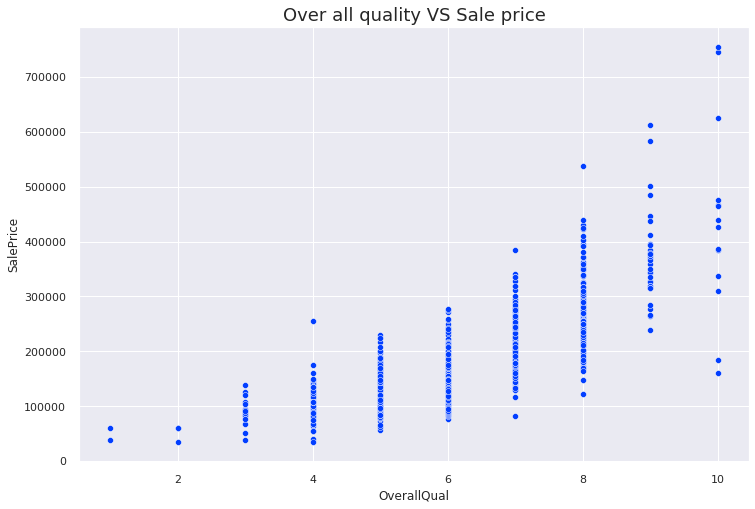

In [17]:
create_scatterplot(train['SalePrice'],train['OverallQual'])
plt.title('Over all quality VS Sale price', fontsize=18);

Generally, a scatter plot is not the best way to visualize categorical variables. However; **OverallQual** is an **ordinal** variable, which means that its categories have a specific order (for example 8 is better than 7), so a scatter plot does make sense in this case. In the graph above we can see that there is an apparent relationship between the two features. The price of the houses increases with the overall quality. Let's examine a few more features to determine the outliers. Let's focus on the numerical variables this time.

**SalePrice vs GrLivArea**

create a scatter plot of SalePrice vs GrLivArea

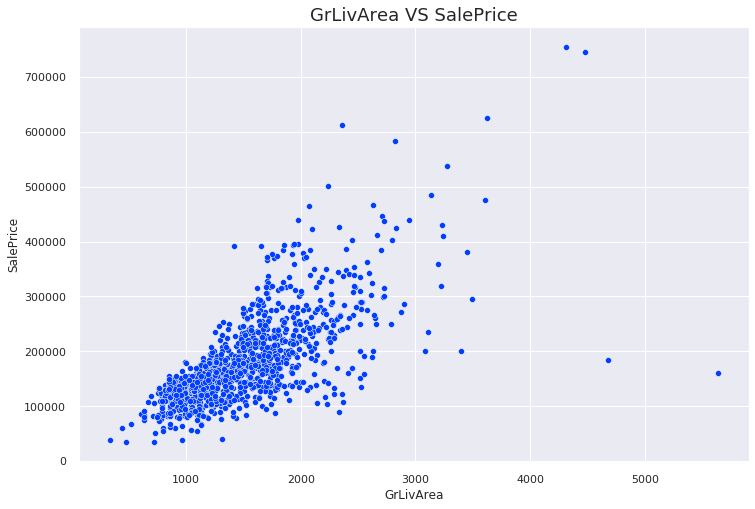

In [18]:
create_scatterplot(train['SalePrice'],train['GrLivArea'])
plt.title('GrLivArea VS SalePrice', fontsize=18);

In [19]:
train['GrLivArea'].value_counts()

864     15
1040    13
894     10
1200     9
848      8
        ..
1110     1
1112     1
1116     1
1117     1
1297     1
Name: GrLivArea, Length: 726, dtype: int64

As you can see, there are two outliers in the plot above. We will get rid off them later (and discuss why we should do this???). Let's look at another scatter plot with a different feature.

**SalePrice vs TotalBsmtSF**

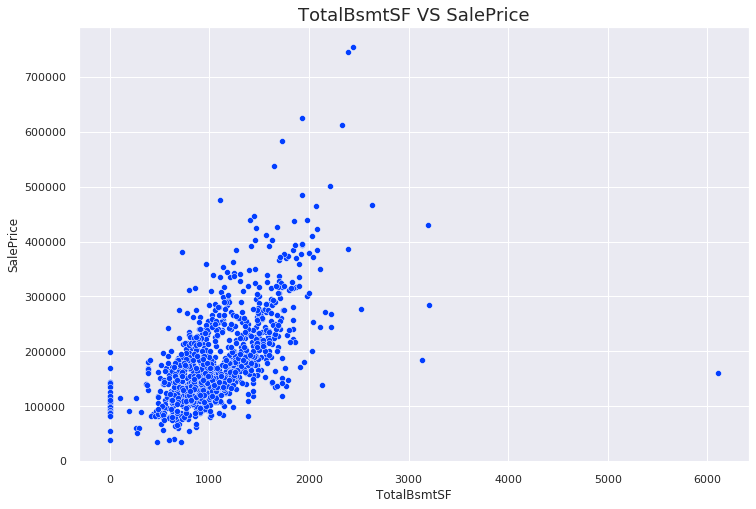

In [20]:
create_scatterplot(train['SalePrice'],train['TotalBsmtSF'])
plt.title('TotalBsmtSF VS SalePrice', fontsize=18);

**SalePrice vs 1stFlrSF**

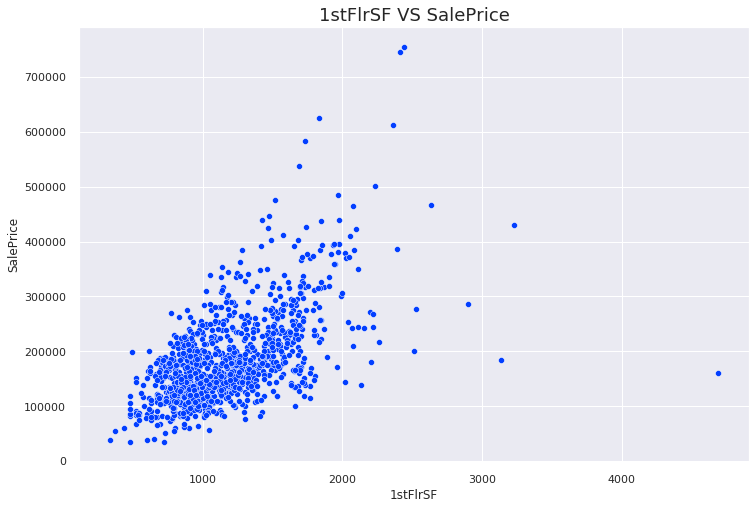

In [21]:
create_scatterplot(train['SalePrice'],train['1stFlrSF'])
plt.title('1stFlrSF VS SalePrice', fontsize=18);

## What have we discovered so far?

* Our target variable shows an unequal level of variance across most features. This is called **Heteroscedasticity (will be elaborated later)** and is a red flag for the multiple linear regression model.
* There are some outliers in the scatter plots.

<br>Let's deal with these outliers by removing them from the data

Remove the two outliers we found in the SalePrice-GrLivArea plot

In [22]:
idx = train['GrLivArea'].sort_values(ascending=False).head(2).index
idx

Int64Index([1298, 523], dtype='int64')

In [23]:
train.drop(index=idx,inplace=True)

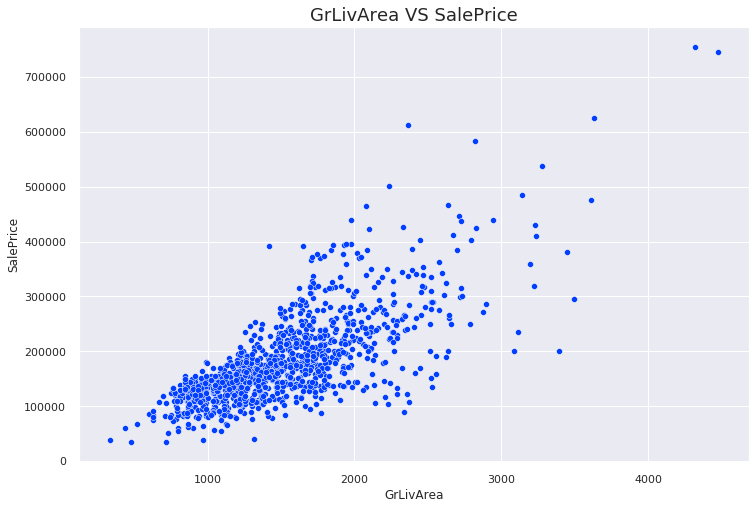

In [24]:
create_scatterplot(train['SalePrice'],train['GrLivArea'])
plt.title('GrLivArea VS SalePrice', fontsize=18);

# Assumptions of Regression

* **Linearity** 
* **Homoscedasticity (Constant Error Variance vs Heteroscedasticity).**
* **The target variable is normally distributed when the features values are fixed.**
* **Multivariate Normality (Normality of Errors).**
* **No or little Multicollinearity.** 

Since we fit a linear model, we assume that the relationship between the features and the target is **linear**, and the errors, or residuals, are pure random fluctuations around the true line.    
We expect that the variability in the dependent variable doesn't increase as the value of the features increases, which is the assumptions of equal variance, also known as **Homoscedasticity**.  
We also assume that the observations are independent of one another (**No Multicollinearity**), and that there is no correlation between sequential observations.

These assumptions often happen simultaneously. In other words, if we see that one of these assumptions holds in the dataset, it's more likely that other assumptions mentioned above will hold as well.  
Therefore, we can find and fix various assumptions with a few unique techniques.

So, **How do we check regression assumptions? We fit a regression line and look for the variability of the response data along the regression line.** 

## Linearity

Linear regression requires the relationship between each independent variable and the dependent variable to be linear.  
The linearity assumption can be tested with scatter plots.  
The following example depicts a case where little linearity is present. 

Scatter plotting for SalePrice and GrLivArea

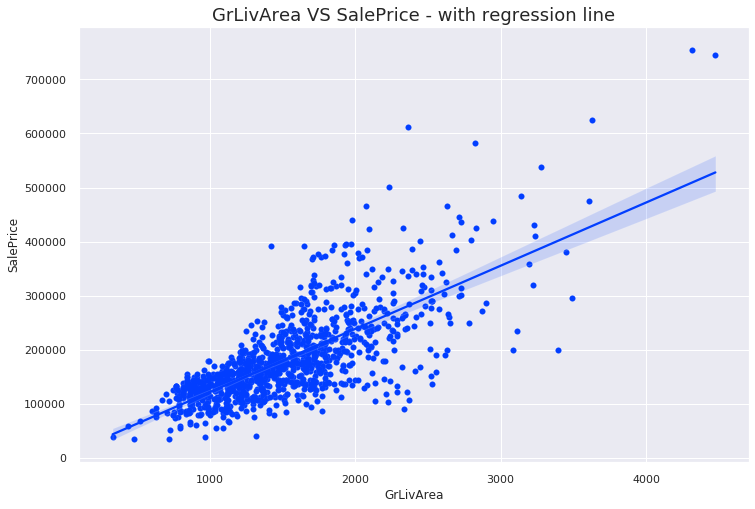

In [25]:
fig, ax1 = plt.subplots(figsize = (12,8), ncols=1,sharey=False)
sns.scatterplot(x = train['GrLivArea'], y = train['SalePrice'],  ax=ax1)
sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], ax=ax1); # plot a regression line. 
plt.title('GrLivArea VS SalePrice - with regression line', fontsize=18);

Interpert the blue strip in the graph above. How well does a linear model fit the data? Does this graph support the homoscedasticity assumtion?

 > The blue strip represents our confidence in the mean of SalePrice (target) wrt GrLiveArea. It seems that our data is distributed linearly up to a certain point (roughly up to 2000-3000). The variace of the target increases as GrLiveArea increases, so the homoscedasticity assumption does not hold.

Sometimes we may be trying to fit a linear regression model when the data might not be so linear, or the function may need another degree of freedom to fit the data.  
In that case, we may need to change our model depending on the data to get the best possible fit.  

## Homoscedasticity

**Homoscedasticity (Constant Variance):** 
Homoscedasticity describes a situation in which the error/variance/noise in the relationship between the independent variables and the dependent variable is the same across all values of the independent variable.  
In other words, there is a constant variance present in the response variable as the predictor variable increases.  
If the "noise" is not the same across the values of an independent variable, we call that **Heteroscedasticity**.  
As you can guess, it is the opposite of **Homoscedasticity.**


<p><img src="https://www.dummies.com/wp-content/uploads/415147.image1.jpg" style="float:center"></img></p>

This plot above is an excellent example of Homoscedasticity.  

As you can see, the residual variance is the same as the value of the predictor variable increases.  
One way to fix this Heteroscedasticity is by using a transformation method like log-transformation. We will do that later.

In the **GrLivArea**-**SalePrice** scatter plot we see that, as the value of **GrLivArea** 
increases, the variance also increases (i.e. we have heteroscedasticity).

### Let's look at the target - SalePrice

Plot a histogram of the label (=target variable)

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

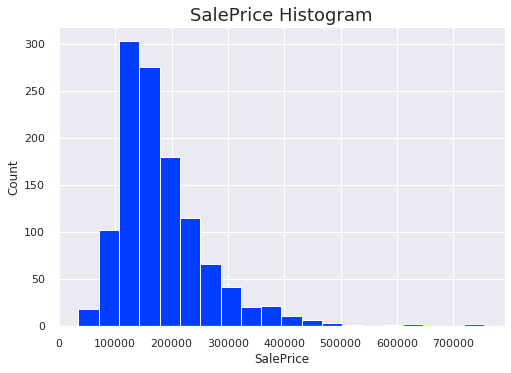

In [27]:
train.SalePrice.hist(bins=20);
plt.title('SalePrice Histogram', fontsize=18);
plt.xlabel('SalePrice');
plt.ylabel('Count');

It seems that the distribution is not symmetric and might have some outliers. Another way of visualizing this is by using a boxpot. 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


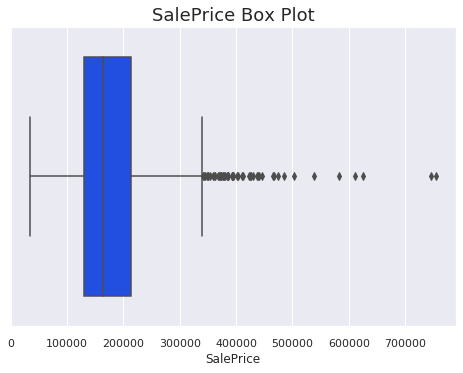

In [28]:
sns.boxplot(train.loc[:,'SalePrice'], orient='v');
plt.title('SalePrice Box Plot', fontsize=18);

These **two** charts above can tell us a lot about our target variable:
* Our target variable, **SalePrice** does not seem to be normally distributed.
* The target variable is right-skewed. 
* There are multiple outliers in the variable.

### Skewness

Skewness is an important attribute of a normal distribtution

<b>Skewness</b> 
According to Wikipedia, 

* "In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.

* For a unimodal distribution, negative skew commonly indicates that the tail is on the left side of the distribution, and positive skew indicates that the tail is on the right. In cases where one tail is long but the other tail is fat, skewness does not obey a simple rule. For example, a zero value means that the tails on both sides of the mean balance out overall; this is the case for a symmetric distribution, but can also be true for an asymmetric distribution where one tail is long and thin, and the other is short but fat."

The following image illustrates the concept of skewness:  
![image](https://cdn-images-1.medium.com/max/1600/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg)

Find out the skewness of our label

In [29]:
train.SalePrice.skew()

1.9419472091599583

> The distribution is highly skewed to the right

So, now we can see that there is quite a bit of Skewness in the target variable.  
This might indicate that some transformation is needed on our target variable. 
Right Skewness can usually be fixed by using log transformation.

### Fixing skewness

Now, let's draw the same graphs from above but this time we'll first transform the target variable using a log function 

Create a new column in your train dataframe **logSalePrice** and set it as the log of the label

Plot the distribution of **logSalePrice**

In [30]:
train['logSalePrice'] = np.log(train.SalePrice)

Create a box-plot of **logSalePrice**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


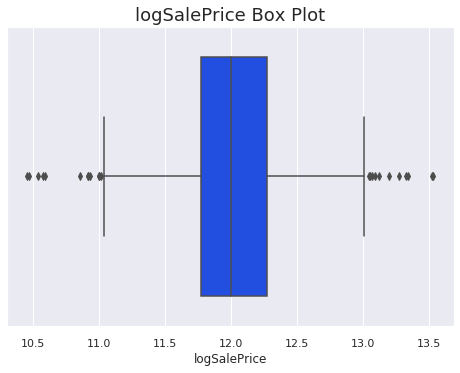

In [31]:
sns.boxplot(train.loc[:,'logSalePrice'], orient='v');
plt.title('logSalePrice Box Plot', fontsize=18);

Create a scatter plot of **GrLivArea** vs **logSalePrice**. Is the heteroscedasticity different the new scatter plot?

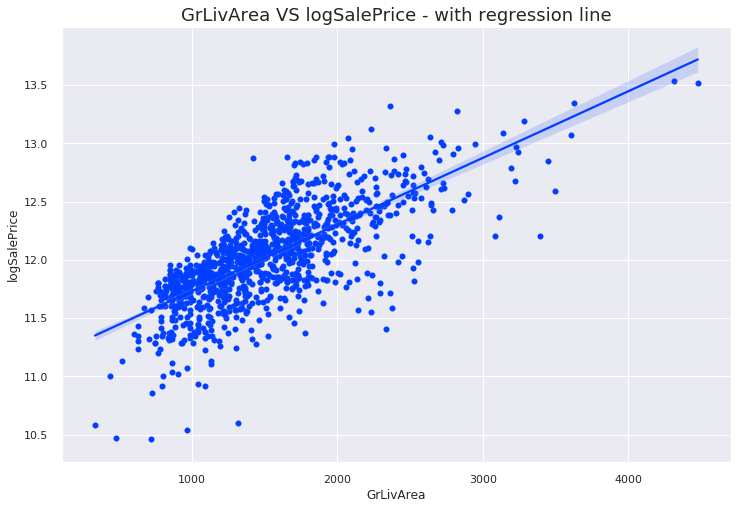

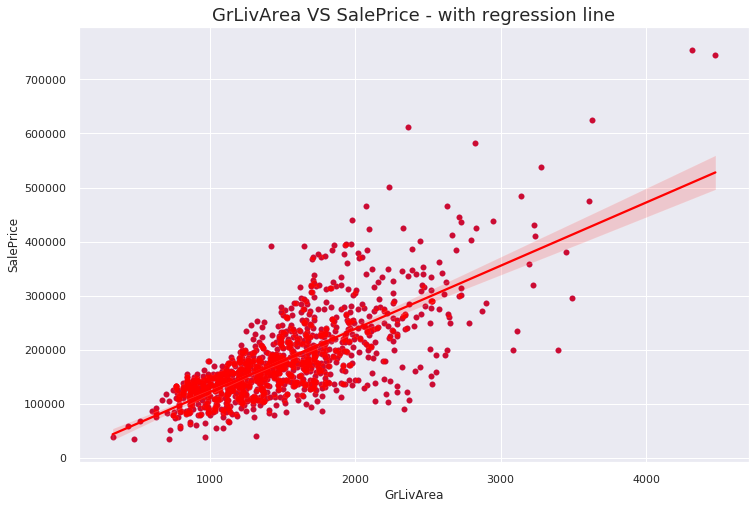

In [32]:
fig, ax1 = plt.subplots(figsize = (12,8), ncols=1,sharey=False)

sns.scatterplot(x = train['GrLivArea'], y = train['logSalePrice'],  ax=ax1)
sns.regplot(x=train['GrLivArea'], y=train['logSalePrice'], ax=ax1); # plot a regression line. 
plt.title('GrLivArea VS logSalePrice - with regression line', fontsize=18);

fig, ax1 = plt.subplots(figsize = (12,8), ncols=1,sharey=False)
sns.scatterplot(x = train['GrLivArea'], y = train['SalePrice'],  ax=ax1)
sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], ax=ax1, color='red'); # plot a regression line.
plt.title('GrLivArea VS SalePrice - with regression line', fontsize=18);

As you can see, the log transformation fixes the heteroscedasticity of the target variable.

## The target variable is normally distributed when the features values are fixed

In plain words, we want to make sure that for each $x_0$ value of the feature $X$, $Y\mid_{X=x_0}$ is a random variable following a normal distribution and its mean lies on the regression line.

Let's choose one of the values of 'OverallQual' feature:  
Do the following for SalePrice and logSalePrice:
1. Plot histogram of the target for OverallQual == 8
2. Check the skewness

SalePrice

skew: 0.745782416459045	 skew_log -0.1295465919510365


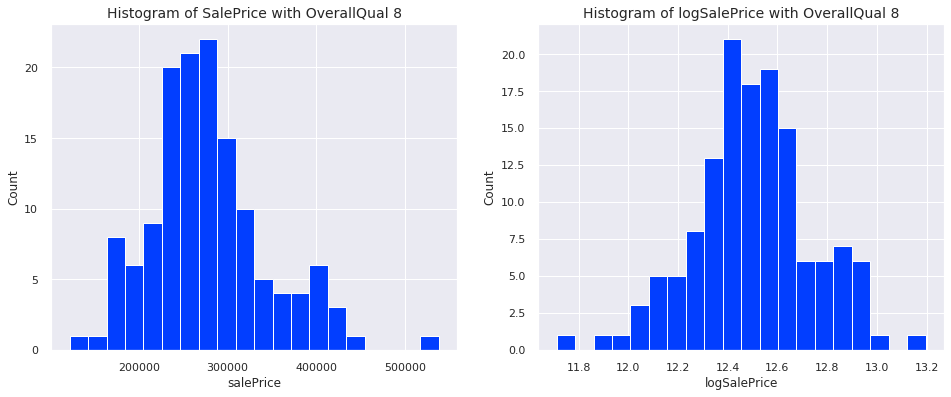

In [33]:
val = 8
col = 'OverallQual'

fig, ax = plt.subplots(1,2, figsize=(16,6))

train[train[col] == val]['SalePrice'].hist(bins=20, ax=ax[0]);
ax[0].set_title(f'Histogram of SalePrice with {col} {val}', fontsize=14)
ax[0].set_xlabel('salePrice')
ax[0].set_ylabel('Count');

train[train[col] == val]['logSalePrice'].hist(bins=20, ax=ax[1]);
ax[1].set_title(f'Histogram of logSalePrice with {col} {val}', fontsize=14)
ax[1].set_xlabel('logSalePrice')
ax[1].set_ylabel('Count');

print('skew: {}\t skew_log {}'.format(train[train[col] == val].SalePrice.skew(), train[train[col] == val].logSalePrice.skew()))

logSalePrice

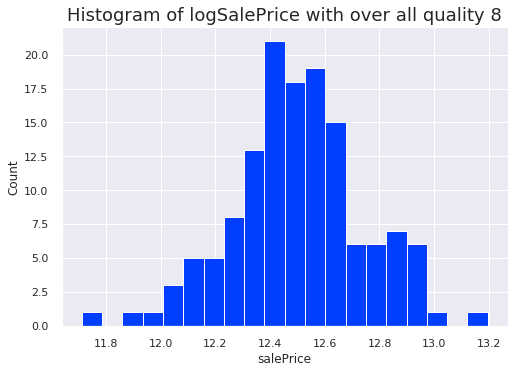

In [34]:
train[train['OverallQual'] == 8]['logSalePrice'].hist(bins=20);
plt.title('Histogram of logSalePrice with over all quality 8', fontsize=18)
plt.xlabel('salePrice')
plt.ylabel('Count');

In [35]:
train[train['OverallQual'] == 8].logSalePrice.skew()

-0.1295465919510365

So, as we can see the log transforamtion makes the target variable follow our assumption more closely.

Select additional features and values and check the distibution of the label and its log-transformation given those values

In [36]:
data[data['GrLivArea']==864]

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
140,140,141,20,RL,70.0000,10500,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0000,TA,TA,CBlock,TA,TA,No,ALQ,432,Unf,0,432,864,GasA,TA,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,TA,5,Typ,1,Po,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,ConLI,Normal,115000
194,194,195,20,RL,60.0000,7180,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,7,1972,1972,Hip,CompShg,HdBoard,HdBoard,None,0.0000,TA,TA,CBlock,TA,TA,Av,ALQ,390,Unf,0,474,864,GasA,TA,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,"1,989.0000",Unf,1,352,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,127000
210,210,211,30,RL,67.0000,5604,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1925,1950,Gable,CompShg,Stucco,Stucco,None,0.0000,TA,TA,CBlock,TA,TA,No,Rec,468,Unf,0,396,864,GasA,TA,N,FuseA,864,0,0,864,1,0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,96,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal,98000
223,223,224,20,RL,70.0000,10500,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0000,TA,TA,CBlock,TA,TA,No,ALQ,524,LwQ,180,160,864,GasA,Gd,Y,SBrkr,864,0,0,864,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,"1,989.0000",Unf,2,576,TA,TA,Y,216,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Abnorml,97000
277,277,278,20,RL,140.0000,19138,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,1Story,4,5,1951,1951,Gable,CompShg,VinylSd,VinylSd,None,0.0000,TA,TA,CBlock,TA,TA,No,LwQ,120,Unf,0,744,864,GasA,Ex,Y,SBrkr,864,0,0,864,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,"1,951.0000",Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,141000
462,462,463,20,RL,60.0000,8281,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Gable,CompShg,MetalSd,MetalSd,None,0.0000,TA,TA,CBlock,TA,TA,No,Rec,553,BLQ,311,0,864,GasA,Gd,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,TA,5,Typ,1,Po,Detchd,"1,965.0000",Unf,1,360,TA,TA,Y,0,0,236,0,0,0,NaN,GdWo,NaN,0,12,2009,WD,Normal,62383
512,512,513,20,RL,70.0000,9100,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1958,1958,Gable,CompShg,VinylSd,VinylSd,None,0.0000,TA,TA,CBlock,TA,TA,No,BLQ,521,LwQ,174,169,864,GasA,TA,Y,SBrkr,864,0,0,864,1,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,"1,964.0000",Unf,2,624,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,129900
537,537,538,20,RL,NaN,12735,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1972,1972,Hip,CompShg,MetalSd,MetalSd,None,0.0000,TA,TA,CBlock,TA,TA,No,BLQ,600,Unf,0,264,864,GasA,TA,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,"1,980.0000",Unf,2,576,TA,TA,Y,216,0,0,0,0,0,NaN,MnWw,NaN,0,4,2008,COD,Normal,111250
571,571,572,20,RL,60.0000,7332,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1959,1959,Gable,CompShg,WdShing,Wd Shng,BrkFace,207.0000,TA,TA,CBlock,TA,TA,No,BLQ,414,Unf,0,450,864,GasA,Ex,Y,SBrkr,864,0,0,864,1,0,1,0,2,1,Gd,4,Typ,0,NaN,Attchd,"1,959.0000",Unf,1,288,TA,TA,Y,168,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,120000
620,620,621,30,RL,45.0000,8248,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,3,1914,1

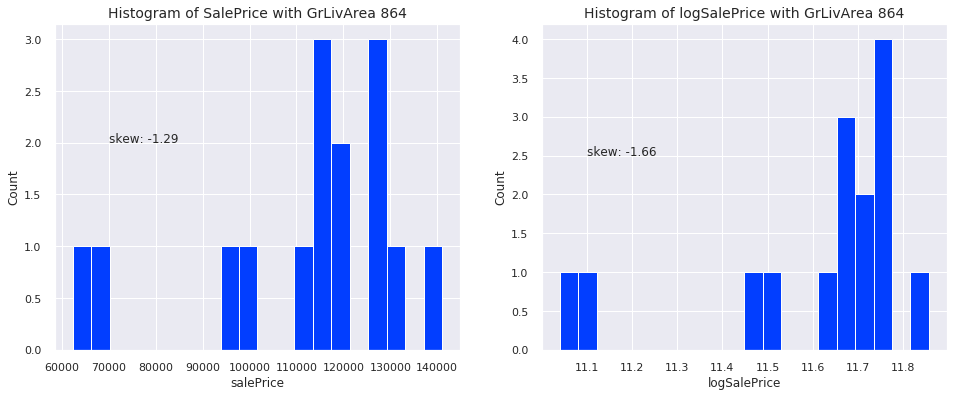

In [37]:
val = 864
col = 'GrLivArea'

fig, ax = plt.subplots(1,2, figsize=(16,6))

train[train[col] == val]['SalePrice'].hist(bins=20, ax=ax[0]);
ax[0].set_title(f'Histogram of SalePrice with {col} {val}', fontsize=14)
ax[0].set_xlabel('salePrice')
ax[0].set_ylabel('Count');
ax[0].set_ylabel('Count');
ax[0].annotate('skew: {:.2f}'.format(train[train[col] == val].SalePrice.skew()), xy=(70000, 2), xytext=(70000, 2))

train[train[col] == val]['logSalePrice'].hist(bins=20, ax=ax[1]);
ax[1].set_title(f'Histogram of logSalePrice with {col} {val}', fontsize=14)
ax[1].set_xlabel('logSalePrice')
ax[1].set_ylabel('Count');
ax[1].annotate('skew: {:.2f}'.format(train[train[col] == val].logSalePrice.skew()), xy=(11.1, 2.5), xytext=(11.1, 2.5));

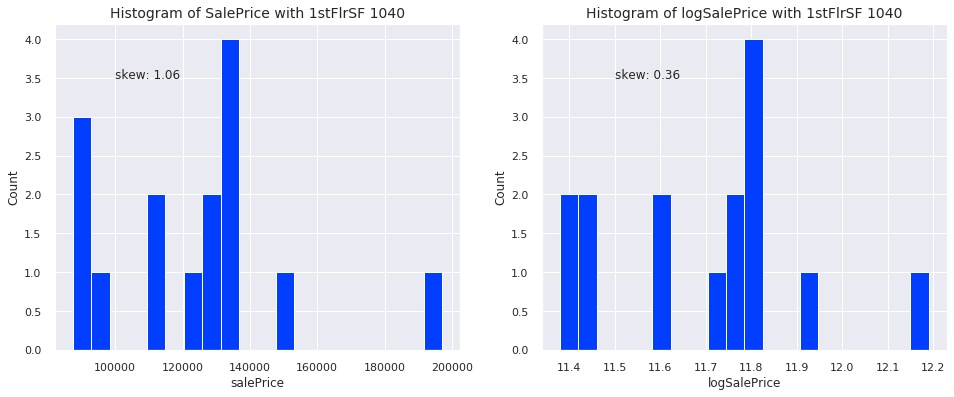

In [38]:
val = 1040
col = '1stFlrSF'

fig, ax = plt.subplots(1,2, figsize=(16,6))

train[train[col] == val]['SalePrice'].hist(bins=20, ax=ax[0]);
ax[0].set_title(f'Histogram of SalePrice with {col} {val}', fontsize=14)
ax[0].set_xlabel('salePrice')
ax[0].set_ylabel('Count');
ax[0].annotate('skew: {:.2f}'.format(train[train[col] == val].SalePrice.skew()), xy=(100000, 3.5), xytext=(100000, 3.5));

train[train[col] == val]['logSalePrice'].hist(bins=20, ax=ax[1]);
ax[1].set_title(f'Histogram of logSalePrice with {col} {val}', fontsize=14)
ax[1].set_xlabel('logSalePrice')
ax[1].set_ylabel('Count');
ax[1].annotate('skew: {:.2f}'.format(train[train[col] == val].logSalePrice.skew()), xy=(11.5, 3.5), xytext=(11.5, 3.5));

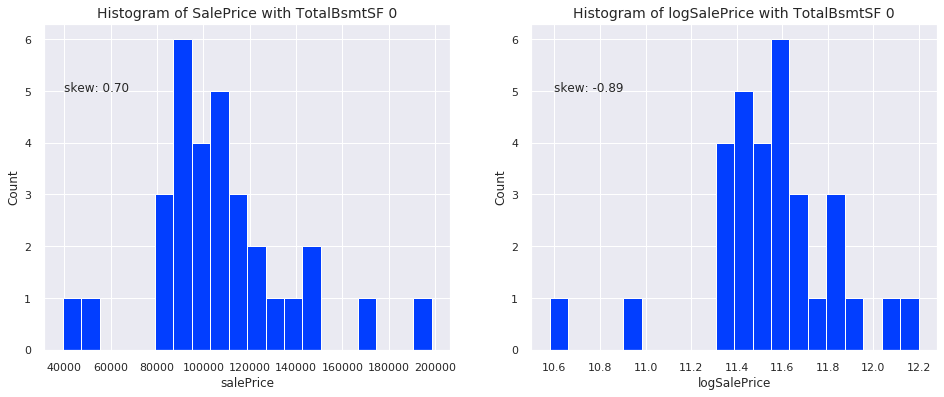

In [39]:
val = 0
col = 'TotalBsmtSF'

fig, ax = plt.subplots(1,2, figsize=(16,6))

train[train[col] == val]['SalePrice'].hist(bins=20, ax=ax[0]);
ax[0].set_title(f'Histogram of SalePrice with {col} {val}', fontsize=14)
ax[0].set_xlabel('salePrice')
ax[0].set_ylabel('Count');
ax[0].annotate('skew: {:.2f}'.format(train[train[col] == val].SalePrice.skew()), xy=(40000,5), xytext=(40000, 5));

train[train[col] == val]['logSalePrice'].hist(bins=20, ax=ax[1]);
ax[1].set_title(f'Histogram of logSalePrice with {col} {val}', fontsize=14)
ax[1].set_xlabel('logSalePrice')
ax[1].set_ylabel('Count');
ax[1].annotate('skew: {:.2f}'.format(train[train[col] == val].logSalePrice.skew()), xy=(10.6, 5), xytext=(10.6, 5));

## No or Little multicollinearity

Multicollinearity is when there is a strong correlation between independent variables. Linear regression or multilinear regression requires independent variables to have few or no similar features. Multicollinearity can lead to a variety of problems, including:
* The effect of predictor variables estimated by our regression will depend on what other variables are included in our model. 
* Predictors can have wildly different results depending on the observations in our sample, and small changes in samples can result in very different estimated effects. 
* We can no longer interpret a coefficient on a variable as the effect on the target of a one-unit increase in that variable holding the other variables constant. The reason behind that is, when predictors are strongly correlated, there is no scenario in which one variable can change without a conditional change in another variable.

A very common way to visualize correlations is using a heat map. An even better way is a clustermap which also allows you to see whether there is multicollinearity or not. We'll discuss methods for solving multicollinearity (such as ridge and lasso methods) later on.

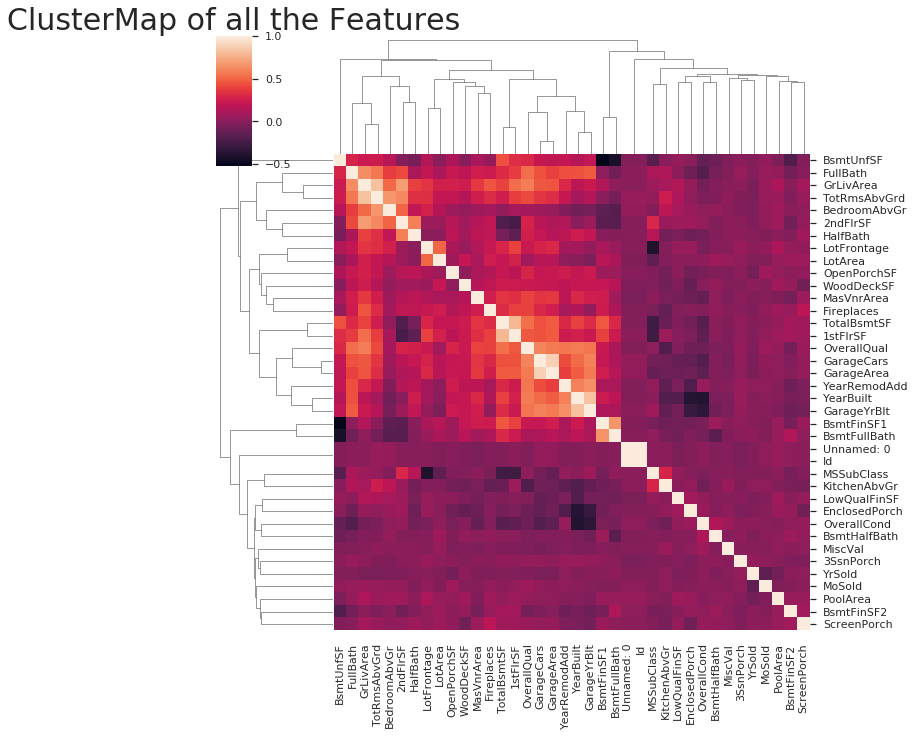

In [40]:
# plt.figure(figsize=(30, 30));
sns.clustermap(train.drop(columns = ['SalePrice', 'logSalePrice']).corr(), xticklabels=True, yticklabels=True);
plt.title("ClusterMap of all the Features", fontsize = 30);
plt.show();

The clustermap arranges correlated features side-by-side. This way it is easier to identify correlated clusters of features (bright squares).  
As we can see, the multicollinearity still exists between various features (bright squares of 2 features or more). However, we will keep them for now for the sake of learning and let the models do the clean up later on. Let's go through some of the correlations. 

* **GarageYrBlt** and **YearBuilt**. 
* **TotRmsAbvGrd** and **GrLivArea**. 
* **GarageCars** and **GarageArea**. 
* **1stFlrSF** and **TotalBsmtSF**  

If we were using only multiple linear regression, it would have been better to delete one feature of each of these feature-pairs from the dataset to fit better multiple linear regression models.  
However since scikit learn modules makes it easy to implement them and get the best possible outcome, we will be using many algorithms.
Therefore, we will keep all the features for now. 

# Preparing data for training

Drop the **Id** column from both the train and test datasets

In [41]:
train.drop(columns=['Id'], inplace=True)
test.drop(columns=['Id'], inplace=True)

Save the targets into separate series called **y_train** and **y_test**

In [42]:
test['logSalePrice'] = np.log(test.SalePrice)

In [43]:
y_train = train['logSalePrice']
y_test = test['logSalePrice']

## Combining train and test datasets together
In this section we'll fill in missing values, and do some feature engineering and selection. Since these are operations we can apply to both the training and test set, will concatenate them so that we can do all the work at once.

We just need to add a column which indicates which rows came from which dataset.

In [44]:
X_train = train.copy()
X_test = test.copy()

In [45]:
X_train['set'] = 'Train'
X_test['set'] = 'Test'

In [46]:
all_data = pd.concat([X_train, X_test]).reset_index(drop=True)

Drop the target variable from all_data

In [47]:
all_data.drop(columns=['SalePrice', 'logSalePrice'], inplace=True)

## Missing values

Write a function that, given a dataframe df, creates a table with the number and percentage of missing values in each column, sorted in desceding order.

In [48]:
all_data.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [49]:
def missing_percentage(df):
    return ((df.isna().agg(['sum', 'mean'], axis=0)).T).sort_values(by='sum', ascending=False)

What does your function output on all_data?

In [50]:
missing_percentage(all_data)

,sum,mean
PoolQC,"1,452.0000",0.9959
MiscFeature,"1,404.0000",0.9630
Alley,"1,367.0000",0.9376
Fence,"1,177.0000",0.8073
FireplaceQu,690.0000,0.4733
...,...,...
ExterQual,0.0000,0.0000
Exterior2nd,0.0000,0.0000
Exterior1st,0.0000,0.0000
RoofMatl,0.0000,0.0000


**Imputing Missing Values**

Some missing values are intentionally left blank, for example: In the Alley feature 
there are blank values meaning that there are no alley's in that specific house. 

Here is a list of all features for which a missing value should remain blank:

In [51]:
missing_val_col_true_none = ["Alley", "PoolQC", "MiscFeature", "Fence",
                             "FireplaceQu", "GarageType", "GarageFinish", 
                             "GarageQual", "GarageCond", 'BsmtQual', 
                             'BsmtCond','BsmtExposure', 'BsmtFinType1', 
                             'BsmtFinType2', 'MasVnrType']

Replace all missing values with np.nan. Note that some missing values may be encoded with different value (e.g. None or 'None')

We look at value_counts of each of the columns conataining missing values, in order to catch different notations that actually mean np.nan

In [52]:
for col in missing_val_col_true_none:
    print(all_data[col].value_counts())

Grvl    50
Pave    41
Name: Alley, dtype: int64
Ex    2
Fa    2
Gd    2
Name: PoolQC, dtype: int64
Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
Gd    378
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
Attchd     869
Detchd     387
BuiltIn     87
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Unf    605
RFn    422
Fin    350
Name: GarageFinish, dtype: int64
TA    1309
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
TA    1324
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
TA    649
Gd    618
Ex    119
Fa     35
Name: BsmtQual, dtype: int64
TA    1309
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
No    953
Av    221
Gd    132
Mn    114
Name: BsmtExposure, dtype: int64
Unf    430
GLQ    416
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype

In [53]:
all_data.loc[all_data['MasVnrType'] == 'None', 'MasVnrType'] = np.nan

In [54]:
all_data[missing_val_col_true_none] = all_data[missing_val_col_true_none].where(all_data[missing_val_col_true_none].notna(), np.nan)

In the following features the null values indicate that the feature doesn't exist in the house, and therefore should be replaced with 0

In [55]:
missing_val_col_zero = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                        'TotalBsmtSF', 'BsmtFullBath',  'BsmtHalfBath', 
                        'GarageArea', 'GarageCars', 'MasVnrArea'] 

Replace missing values in the above columns by 0

In [56]:
all_data[missing_val_col_zero] = all_data[missing_val_col_zero].where(all_data[missing_val_col_zero].notna(), 0)

Some missing values are actually missing. It is sometimes reasonable to fill them with the mean value of the feature (across all entries). This way, the mean the of feature is preserved.
We will use this method on the LotFrontage feature, however, instead of simply filling the missing values with the mean of the feature across the entire dataset, we will calculate the mean for every neighborhood independently.

Create a series, with neighborhood names as indices, containing the mean LotFrontage value **in X_train** of each neighborhood

In [57]:
fill_series = X_train.groupby('Neighborhood')['LotFrontage'].mean()
fill_series

Neighborhood
Blmngtn   48.0000
Blueste   24.0000
BrDale    21.6923
BrkSide   58.6923
ClearCr   84.3000
CollgCr   71.5149
Crawfor   72.5455
Edwards   66.0556
Gilbert   81.2195
IDOTRR    61.8148
MeadowV   27.5833
Mitchel   69.7879
NAmes     76.0764
NPkVill   33.6667
NWAmes    80.9688
NoRidge   91.1200
NridgHt   80.4167
OldTown   63.0805
SWISU     57.1765
Sawyer    75.7561
SawyerW   71.6444
Somerst   65.2687
StoneBr   62.8667
Timber    79.8333
Veenker   49.6000
Name: LotFrontage, dtype: float64

Replace all missing values in all_data['LotFrontage'] by the mean LotFrontage in their neighborhood, according to X_train

**TODO:**

In [58]:
means = fill_series[all_data['Neighborhood']]

In [59]:
all_data.loc[all_data['LotFrontage'].isna(), 'LotFrontage'] = means[all_data['LotFrontage'].isna().values].values

**Question:** Why did we only use the X_train to calculate the mean?

**Answer:**

If we were to calculate the mean by `all_data` (train and test), we will fill values in `test` by values in `train` thus influencing our test data. This will result in potential overfitting, and it will make our calculated model accuracy invalid. On the contrary, when we filled missing values above (with np.nan and zeros), we used `all_data` since the filled value only affected that value, whereas filling missing value with mean, means all values took part in affecting the filled value.

Another example of such a feature is GarageYrBuilt. Repeat the process above for this feature, and take the neighborhood median for it.

In [60]:
fill_series_med = X_train.groupby('Neighborhood')['GarageYrBlt'].median()
meidans = fill_series[all_data['Neighborhood']]
all_data.loc[all_data['GarageYrBlt'].isna(),'GarageYrBlt'] = meidans[all_data['GarageYrBlt'].isna().values].values

### **Missing values in categorical features**

Some categorical features in the data are encoded as integers, even though they should be strings:

In [61]:
all_data[['MSSubClass', 'YrSold', 'MoSold']].dtypes

MSSubClass    int64
YrSold        int64
MoSold        int64
dtype: object

Change these to string dtype

In [62]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype('str')
# # all_data['YrSold'] = all_data['YrSold'].astype('str')
all_data['MoSold'] = all_data['MoSold'].astype('str')

dictionary = {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}

all_data['ExterQual'] = all_data['ExterQual'].replace(dictionary)
all_data['ExterCond'] = all_data['ExterCond'].replace(dictionary)
all_data['HeatingQC'] = all_data['HeatingQC'].replace(dictionary)
all_data['KitchenQual'] = all_data['KitchenQual'].replace(dictionary)

In [63]:
all_data[['MSSubClass', 'YrSold', 'MoSold', 'ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual']].dtypes

MSSubClass     object
YrSold          int64
MoSold         object
ExterQual       int64
ExterCond       int64
HeatingQC       int64
KitchenQual     int64
dtype: object

Since in categorical features there is no concept of "mean", we will fill the missing values with the most common category. Replace missing values in the following features by their most common value (i.e. their <a href= "https://en.wikipedia.org/wiki/Mode_(statistics)#:~:text=The%20mode%20is%20the%20value,most%20likely%20to%20be%20sampled.">mode</a>)

In [64]:
col_fill_mode = ['SaleType','Functional','MSZoning','Utilities',
 'Exterior1st','Exterior2nd','KitchenQual','Electrical'] 

In [65]:
mode_series_col_fill = X_train[col_fill_mode].agg('mode').squeeze(axis=0)
mode_series_col_fill

SaleType            WD
Functional         Typ
MSZoning            RL
Utilities       AllPub
Exterior1st    VinylSd
Exterior2nd    VinylSd
KitchenQual         TA
Electrical       SBrkr
Name: 0, dtype: object

In [66]:
for column in col_fill_mode:
    print(X_train[column].value_counts())

WD       1006
New       103
COD        36
ConLD       6
ConLw       5
ConLI       3
Oth         3
Con         2
CWD         2
Name: SaleType, dtype: int64
Typ     1087
Min2      28
Min1      27
Maj1      11
Mod        9
Maj2       4
Name: Functional, dtype: int64
RL         921
RM         167
FV          56
RH          13
C (all)      9
Name: MSZoning, dtype: int64
AllPub    1165
NoSeWa       1
Name: Utilities, dtype: int64
VinylSd    415
MetalSd    184
HdBoard    177
Wd Sdng    160
Plywood     85
CemntBd     46
BrkFace     39
WdShing     20
Stucco      18
AsbShng     17
Stone        2
AsphShn      1
CBlock       1
BrkComm      1
Name: Exterior1st, dtype: int64
VinylSd    409
MetalSd    179
HdBoard    167
Wd Sdng    152
Plywood    108
CmentBd     46
Wd Shng     27
BrkFace     20
Stucco      19
AsbShng     17
ImStucc      9
Brk Cmn      5
Stone        4
AsphShn      3
CBlock       1
Name: Exterior2nd, dtype: int64
TA    592
Gd    463
Ex     77
Fa     34
Name: KitchenQual, dtype: int64
S

In [67]:
for column in col_fill_mode:
    all_data.loc[all_data[column].isna(), column] = mode_series_col_fill[column]

Check how many missing values are left undealt with. Notice that we are checking missing values only on features which we didn't fill with NaN on purpose.

In [68]:
checked_cols = missing_val_col_true_none + missing_val_col_zero + col_fill_mode
remaining_df = all_data.drop(columns = checked_cols)
remaining_df.isna().sum()

Unnamed: 0       0
MSSubClass       0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
ExterQual        0
ExterCond        0
Foundation       0
Heating          0
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleCondition    0
set              0
dtype: int64

So, there are no missing value left. 

## Creating New Features

Create new features called ['haspool','has2ndfloor','hasgarage','hasbsmt','hasfireplace'] which attain the value 1 if the house has the corresponding amenity (pool, 2nd floor etc) and 0 otherwise.

In [69]:
all_data['has_pool'] = (all_data['PoolArea'] > 0).astype('int64')
all_data['has2ndfloor'] = (all_data['2ndFlrSF'] > 0).astype('int64')
all_data['hasgarage'] = (all_data['GarageArea'] > 0).astype('int64')
all_data['hasbsmt'] = (all_data['TotalBsmtSF'] > 0).astype('int64')
all_data['hasfireplace'] = (all_data['Fireplaces'] > 0).astype('int64')

In [70]:
all_data

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,set,has_pool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
0,258,60,RL,80.0000,12435,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,172.0000,3,2,PConc,Gd,TA,No,GLQ,361,Unf,0,602,963,GasA,4,Y,SBrkr,963,829,0,1792,0,0,2,1,3,1,3,7,Typ,1,TA,Attchd,"2,001.0000",RFn,2,564,TA,TA,Y,0,96,0,245,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,Train,0,1,1,1,1
1,267,75,RL,60.0000,8400,Pave,NaN,Reg,Bnk,AllPub,Inside,Mod,SWISU,Norm,Norm,1Fam,2.5Fin,5,8,1939,1997,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0000,2,2,PConc,TA,TA,No,LwQ,378,Unf,0,342,720,GasA,4,Y,SBrkr,1052,720,420,2192,0,0,2,1,4,1,3,8,Typ,1,Gd,Detchd,"1,939.0000",Unf,1,240,TA,TA,Y,262,24,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,Train,0,1,1,1,1
2,288,20,RL,75.7561,9819,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0000,2,3,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,2,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,2,5,Typ,0,NaN,Detchd,"1,970.0000",Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,Train,0,0,1,1,0
3,649,180,RM,21.0000,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0000,2,2,CBlock,Gd,TA,Av,BLQ,131,GLQ,499,0,630,GasA,3,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,2,3,Typ,0,NaN,NaN,27.5833,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal,Train,0,0,0,1,0
4,1233,20,RL,76.0764,12160,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0000,2,2,CBlock,TA,TA,No,Rec,1000,Unf,0,188,1188,GasA,1,Y,SBrkr,1188,0,0,1188,1,0,1,0,3,1,2,6,Typ,0,NaN,Attchd,"1,959.0000",RFn,2,531,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,COD,Abnorml,Train,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1436,20,RL,60.0000,9000,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1971,1971,Gable,CompShg,HdBoard,HdBoard,NaN,0.0000,2,2,PConc,TA,TA,No,ALQ,616,Unf,0,248,864,GasA,2,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,2,5,Typ,0,NaN,Detchd,"1,974.0000",Unf,2,528,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,5,2007,WD,Normal,Test,0,0,1,1,0
1454,1438,20,RM,90.0000,7407,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,6,7,1957,1996,Gable,CompShg,MetalSd,MetalSd,NaN,0.0000,2,2,CBlock,TA,TA,No,GLQ,600,Unf,0,312,912,GasA,2,Y,FuseA,1236,0,0,1236,1,0,1,0,2,1,2,6,Typ,0,NaN,Attchd,"1,957.0000",Unf,2,923,TA,TA,Y,0,158,158,0,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal,Test,0,0,1,1,0
1455,1455,60,RL,62.0000,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0000,2,2,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,4,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,2,7,Typ,1,TA,Attchd,"1,999.0000",RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,Test,0,1,1,1,1
1

## Deleting features

Removing the features used to create the new features so avoid feature dependancy

In [71]:
col_to_drop = all_data.columns[all_data.columns.str.contains('Pool|2ndFlrSF|Garage|Bsmt|Fireplace')]
col_to_drop

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolArea', 'PoolQC'],
      dtype='object')

In [72]:
all_data.drop(columns = col_to_drop, inplace=True)

Use value_counts() to check which features have low variability. Remove the 3 features with the lowest variability (take care not to remove the columns 'set', though)

In [73]:
temp = all_data.describe(include=np.object)
temp

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,Fence,MiscFeature,MoSold,SaleType,SaleCondition,set
count,1458,1458,1458,91,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,586,1458,1458,1458,1458,1458,1458,1458,281,54,1458,1458,1458,1458
unique,15,5,2,2,4,4,2,5,3,25,9,8,5,8,6,7,15,16,3,6,6,2,5,4,7,3,4,4,12,9,6,2
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,2,Typ,Y,MnPrv,Shed,6,WD,Normal,Train
freq,536,1149,1452,50,925,1311,1457,1051,1380,225,1260,1444,1218,726,1141,1433,515,504,445,645,1426,1363,1333,735,1358,1338,157,49,253,1267,1198,1166


In [74]:
((temp.loc['count',:] - temp.loc['freq',:]) * temp.loc['unique',:]).sort_values().head(5)

Utilities        2
Street          12
MiscFeature     20
Alley           82
Condition2     112
dtype: object

In [75]:
# -((all_data.MSZoning.value_counts(normalize=True))* np.log((all_data.MSZoning.value_counts(normalize=True))))

In [76]:
all_data.drop(columns=['Utilities', 'Street', 'MiscFeature'], inplace=True)

**Question**: why have we decided to delete these features?

**Answer**: value_counts shows extremely low variablity of values. Therefore these features will probably not contribute to our model.

## Creating Dummy Variables. 


A dummy variable is a way to convert categorical variable into numerical variable used in regression to represent subgroups of the feature.  
For example: 
if we have a feature with 'yes' / 'no' categories, we would use a 0,1 dummy variable where a 1 is given for 'yes' and 0 for 'no'.  

Dummy variables are useful because they enable us to use a single regression equation to represent multiple groups.  
This means that we don’t need to write out separate models for each subgroup.

Find all categorical features and use pd.get_dummies to replace them with dummy variable. Make sure to remove the original features from your dataframe.

In [77]:
cat_columns = all_data.describe(include=np.object).columns
cat_columns

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'Fence',
       'MoSold', 'SaleType', 'SaleCondition', 'set'],
      dtype='object')

In [78]:
final_all_data = pd.get_dummies(all_data)
final_all_data

,Unnamed: 0,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,HeatingQC,1stFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,YrSold,has_pool,has2ndfloor,hasgarage,hasbsmt,hasfireplace,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_1,KitchenQual_2,KitchenQual_3,KitchenQual_4,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,set_Test,set_Train
0,258,80.0000,12435,7,5,2001,2001,172.0000,3,2,4,963,0,1792,2,1,3,1,7,0,96,0,245,0,0,2008,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

## Spltting back to train and test
Split the all_data dataframe back to X_train and X_test

In [79]:
fX_train = final_all_data[final_all_data['set_Train'] == 1].drop(columns=['set_Test', 'set_Train'])
fX_test = final_all_data[final_all_data['set_Test'] == 1].drop(columns=['set_Test', 'set_Train'])

# Learning 

Before we start training models and comparing them, we need some notion of "quality" of a model, that will allow us to compare various models and choose the best one.

A most common such notion is the **Mean Squared Error (MSE)** which you have encountered in class. For a given label vector $y$ and predicted labels $\hat{y}$, we have $MSE(y, \hat{y})=\frac{1}{n}\sum_{i=1}^{n}{(y_i - \hat{y_i}) ^ 2}$.
First, let us consider a constant model - that is, a model that predicts the same value for all samples, regardless of their features.

**Question**: What is the constant model with the least MSE? Prove your answer. What is its MSE on our train and test set?

**Answer**: The constant that will minimize the MSE is the mean target. If we take a deriviative of the MSE wrt y_pred we see that y_pred that zeros this derivitive is the average. In our case, the MSE using this constant is:

In [80]:
MSE_train = np.square(y_train - y_train.mean()).mean()
MSE_test = np.square(y_test - y_train.mean()).mean()
print(f'Train MSE: {MSE_train}, Test MSE: {MSE_test}')

Train MSE: 0.1621913945988749, Test MSE: 0.1495661480837573


Compute the MSE of your model against the constant model you found. Use sklearn.metrics.mean_squared_error. What is the model's score for the test set? What is its score for the training set?

In [81]:
from sklearn.metrics import mean_squared_error


## Now let's train a model using a single feature, GrLivArea, how much better is it?

In [82]:
from sklearn.linear_model import LinearRegression

initiate an instance of sklearn.linear_model.LinearRegression and use it to fit a model with 'GrLivArea' as its only features. What is its MSE on the train and test set? What is the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score">model's score</a> on these sets?


In [83]:
simple_LR = LinearRegression().fit(fX_train[['GrLivArea']],y_train)

In [105]:
simple_LR.predict(fX_train[['GrLivArea']])

array([12.18541286, 12.41422346, 11.67516522, ..., 11.84334101,
       12.14193885, 12.43195628])

In [84]:
print(f"MSE of train: {mean_squared_error(y_train, simple_LR.predict(fX_train[['GrLivArea']]))}")
print(f"MSE of test: {mean_squared_error(y_test, simple_LR.predict(fX_test[['GrLivArea']]))}")

MSE of train: 0.07760740486865311
MSE of test: 0.06804224964543583


## OK, now lets try using all features

Fit a linear regression model on all fetures using the same package    

In [87]:
full_LR = LinearRegression().fit(fX_train,y_train)

What is its MSE on the test and train set?

In [88]:
print(f"MSE of train: {mean_squared_error(y_train, full_LR.predict(fX_train))}")
print(f"MSE of test: {mean_squared_error(y_test, full_LR.predict(fX_test))}")

MSE of train: 0.010619793271852978
MSE of test: 0.012400236828019143


Cool! So adding more features and making our model more complex improves our model. Will more complex models always perform better than simpler models? 

## Let's try adding degree-2 polynomial features
that is, the square of every feature and the product of every pair of features

Use <a href=https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html>sklearn.preprocessing.PolynomialFeatures</a> to create a dataframe of all degree 2 combinations of features in your data, and apply a linear regression to the transformed dataset.

_Note:_ use <a href= "https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">sklearn.pipeline.Pipeline</a> to create a model that squares all features and predicts in one go. This will also be useful for future steps.

In [90]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [93]:
pipe = Pipeline(steps=(('polyDeats',PolynomialFeatures()),('LR',LinearRegression())))
pipe.fit(fX_train,y_train)

0.9599690853631487

What is your new model's MSE on the training and test sets?

In [94]:
print(f"MSE of train: {mean_squared_error(y_train, pipe.predict(fX_train))}")
print(f"MSE of test: {mean_squared_error(y_test, pipe.predict(fX_test))}")

MSE of train: 1.1852580797141155e-21
MSE of test: 0.9599690853631487


Oh dear! The train MSE is now almost 0, but the test score is even worse than that of the constant model. This is since the model is now over complicated and rather than learning the underlying structure of the data, it is memorizing the training data. This is called overfitting. One common way to combat this is by adding a regularization term, which penalizes models for overcomplicating and motivates them to choose simpler solution. 

Let's try adding an L1 regularization term (this is called the LASSO model), which adds the sum of absolute values of the weights to the loss. Use <a href= "https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html">sklearn.linear_model.Lasso</a> with an alpha value of 0.009 and see if the model improves.

In [120]:
from sklearn.linear_model import Lasso
lasso = Lasso(0.009)
pipe_lasso = Pipeline(steps=(('polyDeats',PolynomialFeatures()),('lassoLR',lasso)))
pipe_lasso.fit(fX_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.598e+00, tolerance: 1.891e-02
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('polyDeats', PolynomialFeatures()),
                ('lassoLR', Lasso(alpha=0.009))])

In [121]:
print(f"MSE of train: {mean_squared_error(y_train, pipe_lasso.predict(fX_train))}")
print(f"MSE of test: {mean_squared_error(y_test, pipe_lasso.predict(fX_test))}")

MSE of train: 0.0012668285647510979
MSE of test: 0.132077823398264


This is a little better but still not as good as it should be. Let's try normalizing the data and see if that helps.

Use the <a href= "https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standard%20scaler#sklearn.preprocessing.StandardScaler"> sklearn.preprocessing.StandardScaler</a> to normalize your data to have mean 0 and std 1, and fit your model with the normalized data, after all steps above (lasso and deg-2 poly transformation).

In [102]:
from sklearn.preprocessing import StandardScaler

What is the MSE of your model on the training and test sets?

In [103]:
pipe_lasso_scaled = Pipeline(steps=(('polyDeats',PolynomialFeatures()),('scaler',StandardScaler()),('lassoLR',lasso)))
pipe_lasso_scaled.fit(fX_train,y_train)
print(f"MSE of train: {mean_squared_error(y_train, pipe_lasso_scaled.predict(fX_train))}")
print(f"MSE of test: {mean_squared_error(y_test, pipe_lasso_scaled.predict(fX_test))}")

MSE of train: 0.010929982312492396
MSE of test: 0.011873147706905389


Good, we fixed the overfitting and even made a slight improvement.
Why is normalization important when adding regularization? What would happen if we normalize in unregularized linear regression?

 > Without normalization, weights are adjusted according to feature scales (and, off course, importance). When adding regularization we constrain the weights, so features with really small scales won't be able to affect predictions (since their weights can't be large). Normalization of the features solves this.

### Model accuracy comparison

In [124]:
print(f'Simple LR relative accuracy: {(np.abs(simple_LR.predict(fX_test[["GrLivArea"]]) - y_test)/y_test).mean()}')
print(f'Full LR relative accuracy: {(np.abs(full_LR.predict(fX_test) - y_test)/y_test).mean()}')
print(f'Polynomial LR relative accuracy no regularization: {(np.abs(pipe.predict(fX_test) - y_test)/y_test).mean()}')
print(f'Polynomial LR relative accuracy with regularization: {(np.abs(pipe_lasso.predict(fX_test) - y_test)/y_test).mean()}')
print(f'Polynomial LR scaled relative accuracy with regularization: {(np.abs(pipe_lasso_scaled.predict(fX_test) - y_test)/y_test).mean()}')


Simple LR relative accuracy: 0.01639787394864057
Full LR relative accuracy: 0.006789130962994957
Polynomial LR relative accuracy no regularization: 0.04200437344338794
Polynomial LR relative accuracy with regularization: 0.014543390252795366
Polynomial LR scaled relative accuracy with regularization: 0.006628389346843677


# A note about regularization

In the unregularized setting, normalizing doesn't affect the solution. Consider $X, y$ and $A, b$ which minimizes $||AX+b - y||$. Now suppose we normalize $X$ to get $D(X-\bar{X})$ where $D$ is a diagonal matrix that scales $X$ - we now try to minimize $||AD(X-\bar{X})+b - y||$, but rewriting $A'=AD, b'=b - AD \bar{X}$ we see that we can move the normalization into the solution that minimizes with resepect to the unnormalized $X$. However, when adding regularization, we "punish" each feature based on the magnitude of its coefficient, so scaling a feature by $c$ and its coefficient by $\frac{1}{c}$  are no longer equivalent since we change the punishment for that coefficient. This means that we disproportionately punish features of smaller scale and the solution may become dominated by features of larger scale which require smaller coefficients to produce the same impact on the prediction